# Introdução a Pandas

Nessa aula (ou melhor, notebook ~~valeu Corona~~ ) vamos falar um pouco sobre a biblioteca Pandas, sobre como utilizá-la e como fazer as primeiras análises.  

## Sumário

- [Extras de Jupyter](#Extras-de-Jupyter)
- [O que é Pandas](#O-que-é-Pandas?) 
- [Setup Inicial](#Setup-Inicial?)
- [Mãos à Obra](#Mãos-à-obra!)
    - [Importando a Biblioteca](#Importando-a-biblioteca)
    - [Tipos de Estruturas](#Tipos-de-estruturas)
    - [Leitura de dados](#Leitura-de-dados)
    - [Visualização do Dataframe](#Visualização-do-Dataframe)
    - [Seleção dos Dados](#Seleção-dos-dados)
    - [Indexação booleana](#Indexação-booleana)
    - [Operações](#Operações)
    - [Apply](#Apply)
    - [Funções Úteis](#Funções-Úteis)
    - [Dados Faltantes](#Dados-faltantes)
    - [Plot](#Plot)
    - [Exportação](#Exportação)
- [Exercícios](#Exercícios)
- [Conclusão](#Conclusão)
- [Referências](#Referências)
- [Dúvidas?](#Dúvidas?)

## Extras de Jupyter

Já vimos um pouco sobre o que é e como utilizar um Jupyter Notebook, mas esta é uma ferramenta muito poderosa e interessante, então vejamos mais algumas possibilidades legais que ela nos oferece:

- %%time: calcula o tempo de execução de uma célula, para utilizar essa função basta inserir *%%time* no início de uma célula.
- ??: sabe quando você quer usar uma função, mas não lembra os parâmetros? É para isso que serve o *??*. Escrevendo as duas interrogações antes de uma função, ficará visível sua documentação no próprio jupyter!
- ?: uma única interrogação é utilizada para obter informações sobre uma variável.

Os comandos acima podem ser usados assim:

In [1]:
# informações sobre a função range, que vamos usar logo mais
??range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type


In [2]:
%%time
# calculando o tempo de execução do laço de repetição que utiliza o range e altera a variável soma

soma = 0
for i in range(1000):
    soma += i

CPU times: user 340 µs, sys: 0 ns, total: 340 µs
Wall time: 346 µs


In [3]:
# informações sobre a variável soma
?soma

Type:        int
String form: 499500
Docstring:  
int(x=0) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


## O que é Pandas?
Pandas é uma biblioteca Python. Ela permite que façamos uma série de manipulações e análises de dados de forma simples e eficiente.

## Setup Inicial
Assim como boa parte das bibliotecas, é preciso instalar Pandas no seu computador. Isso vai depender um pouco do seu Sistema Operacional, por isso recomendo seguirem os [tutoriais de instalação](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html).  

Além disso, para que esse notebook funcione adequadamente é preciso que seja feito o download e a extração desse [aquivo](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)  e que ele se encontre na mesma pasta do arquivo desse notebook.

## Mãos à obra!

### Importando a biblioteca
O primeiro passo é importar a biblioteca. Para isso, utilizamos o comando abaixo. 

In [4]:
import pandas as pd

### Tipos de estruturas
Existem basicamente dois tipos de estruturas de dados em Pandas: as Series e os Dataframes.

Uma **Serie** é como uma lista, ou um array unidimensional. Ela é capaz de armazenar diversos tipos de dados (inteiros, strings, floats, objetos....), mas é preciso que os dados de uma Serie sejam todos de um mesmo tipo, ao contrário de uma lista normal que permite misturas. Podemos criar uma serie passando uma lista de valores para a função que a gera:


In [5]:
quantidades = pd.Series([10, 9, 9, 4, 5, 7])

quantidades

0    10
1     9
2     9
3     4
4     5
5     7
dtype: int64

Falamos acima que uma Serie é um array unidimensional, então por que vemos duas colunas ao imprimir Notas?

Bom, isso acontece pois a Serie possui uma coluna de Index, ou seja, uma coluna de rótulos para os seus elementos. Dessa forma, podemos definir nossos próprios indices para uma Serie:

In [6]:
frutas_serie = pd.Series(data = [10, 9, 9, 4, 5, 7], 
                        index = ['Maçã', 'Banana', 'Pera', 'Uva', 'Mamão', 'Laranja'])

frutas_serie

Maçã       10
Banana      9
Pera        9
Uva         4
Mamão       5
Laranja     7
dtype: int64

Para facilitar a criação de Series com idices, podemos utilizar dicionários (vistos na [aula 0](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula0/Jupyter%20e%20Python.ipynb)) da seguinte forma:

In [7]:
dict_frutas = {'Maçã' : 10, 'Banana' : 9, 'Pera' : 9, 'Uva' : 4, 'Mamão' : 5, 'Laranja' : 7}
frutas_serie = pd.Series(dict_frutas)

frutas_serie

Maçã       10
Banana      9
Pera        9
Uva         4
Mamão       5
Laranja     7
dtype: int64

Já um **Dataframe** é mais próximo de uma planilha ou uma tabela, ou seja, uma estrutura **multi**dimensional de dados. Podemos pensar num Dataframe como um conjunto de Series, onde cada uma das colunas da tabela é uma Serie. Cada linha da planilha será um *Exemplo* e terá diversas informações, as quais serão nomeadas nas colunas, e esses são os nossos *Atributos* ou *Features*. Assim como para as Series, podemos criar um Dataframe de diversas maneiras. Por exemplo utilizando um dicionário:

In [8]:
dict_frutas = {'Nome': ['Maçã', 'Banana', 'Pera', 'Uva', 'Mamão', 'Laranja'], 
               'Quantidade': [10, 9, 9, 4, 5, 7], 
               'Preço': [1, 0.5, 9, 4.99, 2.50, 1.99],
               'Fornecedor': ['Beto', 'Ze', 'Chico', 'Tião', 'Jão', 'Marcão']}

frutas_df = pd.DataFrame(dict_frutas)
frutas_df

,Nome,Quantidade,Preço,Fornecedor
0,Maçã,10,1.00,Beto
1,Banana,9,0.50,Ze
2,Pera,9,9.00,Chico
3,Uva,4,4.99,Tião
4,Mamão,5,2.50,Jão
5,Laranja,7,1.99,Marcão


No exemplo acima, temos quatro features (Nome, Quantidade, Preço e Fornecedor) e seis exemplos. Cada exemplo tem um valor para cada uma das suas features.  

Essa é a ideia do Dataframe: linhas de dados separados em colunas.

### Leitura de dados
Em geral os nossos dados são armazenados em arquivos. Precisamos, assim, que as informações sejam lidas do arquivo para que possamos tratá-lo como um Dataframe e utilizar seus métodos.

Existem diferentes funções para ler os arquivos, a depender do seu formato. Por exemplo:

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): lê arquivos no formato csv (comma-separated values)
- [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html): lê planilhas do excel (é preciso instalar uma [extensão](https://pypi.org/project/xlrd/) para utilizá-la)
- [read_htlm](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html): lê tabelas direto de um site

Cada uma dessas funções tem diversos parâmetros que serão mais explorados conforme formos utilizando a biblioteca.
O que todos têm em como é que devemos informar o nome do arquivo jutamente com caminho completo para alcançá-lo.  

Vamos utilizar, no exemplo, a função para ler arquivos no formato csv. Esse tipo de arquivo tem seus valores separados por vírgula, ponto-e-vírgula ou outro caracter. Alguns dos parâmetros relevantes são:

- filepath: o caminho para o arquivo (único parâmetro obrigatório)
- sep: caracter utilizado como separador no arquivo, por padrão é ','
- index_col = coluna que define o indice

O arquivo que utilizaremos nessa aula contém dados sobre o Coronavírus (sempre legal usar dados reais e recentes).

In [9]:
df = pd.read_csv('covid_19_data.csv', index_col = 0)
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


### Visualização do Dataframe

Muitas vezes queremos visualizar o nosso Dataframe para obter novas informações, debugar (T.T), tirar dúvidas e muito mais.

Podemos ver a dimensão do dataframe e, assim, saber quantas linhas (exemplos) e quantas colunas (features) temos. Com o atributo **shape** teremos uma tupla com a quantidade de linhas e a quantidade de colunas, respectivamente:

In [10]:
df.shape

(11614, 7)

É possível ver os indices do dataframe com o atributo **index**:

In [11]:
df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            11605, 11606, 11607, 11608, 11609, 11610, 11611, 11612, 11613,
            11614],
           dtype='int64', name='SNo', length=11614)

E os nomes das colunas (features) com o atributo **columns**:

In [12]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Os tipos dos dados de cada um das colunas com o **dtypes**:

In [13]:
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Os primeiros exemplos do dataframe com o método **head**:

In [14]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


E os últimos exemplos do dataframe com o método **tail**:

In [15]:
df.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
11610,04/03/2020,Wyoming,US,2020-04-03 22:52:45,162.0,0.0,0.0
11611,04/03/2020,Xinjiang,Mainland China,2020-04-03 22:52:45,76.0,3.0,73.0
11612,04/03/2020,Yukon,Canada,2020-04-03 22:52:45,6.0,0.0,0.0
11613,04/03/2020,Yunnan,Mainland China,2020-04-03 22:52:45,184.0,2.0,172.0
11614,04/03/2020,Zhejiang,Mainland China,2020-04-03 22:52:45,1260.0,1.0,1228.0


Uma breve descrição estatística de cada uma das features numéricas com o **describe**:

In [16]:
df.describe()

,Confirmed,Deaths,Recovered
count,11614.000000,11614.000000,11614.000000
mean,1175.025831,51.019373,320.180902
std,7096.206263,490.706034,3145.856598
min,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000
75%,266.000000,2.000000,17.000000
max,119827.000000,14681.000000,63612.000000


### Seleção dos dados

Outra funcionalidade muito útil e importante é a de selecionar e acessar parte dos dados.

Podemos, por exemplo, selecionar uma feature específica. Para isso, acessamos o dataframe como se fosse um dicionário (visto na [Aula 0](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula0/Jupyter%20e%20Python.ipynb)), colocando entre colchetes o nome da feature que queremos.  
Vimos quais são as colunas do dataframe com o comando utilizando seu atributo [columns](#Visualização-do-Dataframe), então agora basta acessar qualquer uma delas.

In [17]:
df['Province/State']

SNo
1                           Anhui
2                         Beijing
3                       Chongqing
4                          Fujian
5                           Gansu
6                       Guangdong
7                         Guangxi
8                         Guizhou
9                          Hainan
10                          Hebei
11                   Heilongjiang
12                          Henan
13                      Hong Kong
14                          Hubei
15                          Hunan
16                 Inner Mongolia
17                        Jiangsu
18                        Jiangxi
19                          Jilin
20                       Liaoning
21                          Macau
22                        Ningxia
23                        Qinghai
24                        Shaanxi
25                       Shandong
26                       Shanghai
27                         Shanxi
28                        Sichuan
29                         Taiwan
30        

In [18]:
df['ObservationDate']

SNo
1        01/22/2020
2        01/22/2020
3        01/22/2020
4        01/22/2020
5        01/22/2020
6        01/22/2020
7        01/22/2020
8        01/22/2020
9        01/22/2020
10       01/22/2020
11       01/22/2020
12       01/22/2020
13       01/22/2020
14       01/22/2020
15       01/22/2020
16       01/22/2020
17       01/22/2020
18       01/22/2020
19       01/22/2020
20       01/22/2020
21       01/22/2020
22       01/22/2020
23       01/22/2020
24       01/22/2020
25       01/22/2020
26       01/22/2020
27       01/22/2020
28       01/22/2020
29       01/22/2020
30       01/22/2020
            ...    
11585    04/03/2020
11586    04/03/2020
11587    04/03/2020
11588    04/03/2020
11589    04/03/2020
11590    04/03/2020
11591    04/03/2020
11592    04/03/2020
11593    04/03/2020
11594    04/03/2020
11595    04/03/2020
11596    04/03/2020
11597    04/03/2020
11598    04/03/2020
11599    04/03/2020
11600    04/03/2020
11601    04/03/2020
11602    04/03/2020
11603    04/03/2

Outra possibilidade é a de selecionar uma linha do dataframe. É possível fazê-lo utilizando comandos diferentes:

- [iloc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html): acessa uma linha pela sua posição no dataframe. Se acessarmos a posição 1, teremos o segundo exemplo do dataframe.
- [loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html): acessa uma linha por meio de uma *label*. Pode ser, por exemplo, uma indexação booleana (como veremos a seguir) ou o indice da linha. Se acessarmos o indice 1, teremos o primeiro exemplo do dataframe, já que esse é o indice.

Abaixo vemos a execução dos dois. Note que apesar de acessarmos '1' em ambos os casos, com iloc temos o exemplo cujo Name é 2, ou seja, o segundo exemplo do dataframe, enquanto no caso do loc temos o exemplo com Name 1, ou seja, o primeiro exemplo do dataframe.

In [19]:
df.iloc[1]

ObservationDate         01/22/2020
Province/State             Beijing
Country/Region      Mainland China
Last Update        1/22/2020 17:00
Confirmed                       14
Deaths                           0
Recovered                        0
Name: 2, dtype: object

In [20]:
df.loc[1]

ObservationDate         01/22/2020
Province/State               Anhui
Country/Region      Mainland China
Last Update        1/22/2020 17:00
Confirmed                        1
Deaths                           0
Recovered                        0
Name: 1, dtype: object

É importante ressaltar que tanto *loc* quanto *iloc* são ideais para o acesso de linhas, mas não para a sua modificação. Para tanto é preciso utilizar *at* e *iat*, que se comportam de forma semelhante ao *loc* e *iloc* respectivamente.

### Indexação booleana
Já vimos como selecionar linhas e colunas do nosso dataframe, mas e se quisermos selecionar apenas as linhas que cumprem certo requisito?  
Para isso, utilizamos a chamada indexação booleana. Utiliza-se uma expressão que retorna uma Serie ou um Dataframe apenas com valores booleanos (True ou False), o qual é utilizado para fazer a seleção do Dataframe.

Se quisermos, por exemplo, ver apenas as linhas que tem informações dos dias nos quais não houve nenhuma uma morte devido ao vírus. Primeiro geramos uma Serie com valores booleanos:

In [21]:
df['Deaths'] == 0

SNo
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
         ...  
11585    False
11586    False
11587    False
11588     True
11589    False
11590    False
11591     True
11592    False
11593    False
11594    False
11595    False
11596    False
11597    False
11598    False
11599     True
11600     True
11601    False
11602    False
11603    False
11604     True
11605    False
11606    False
11607    False
11608    False
11609    False
11610     True
11611    False
11612     True
11613    False
11614    False
Name: Deaths, Length: 11614, dtype: bool

Em seguida utilizamos tal Serie para indexar o Dataframe:

In [22]:
df[df['Deaths'] == 0]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


Também é possível que mais de uma condição seja considerada. Nesse caso utilizamos os operadores and, or e not como operadores bitwise, ou seja, como &, | e ~.  
Vamos selecionar as linhas que indicam dias nos quais não houve nenhuma morte e nenhum caso confirmado:

In [23]:
df[(df['Deaths'] == 0) & (df['Confirmed'] == 0)]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
11,01/22/2020,Heilongjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
13,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
16,01/22/2020,Inner Mongolia,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
19,01/22/2020,Jilin,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
23,01/22/2020,Qinghai,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
24,01/22/2020,Shaanxi,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
31,01/22/2020,Tibet,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
33,01/22/2020,Xinjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Se quisermos saber quanto exemplos satisfazem essas condições, é possível utilizar os operadores (que serão vistos logo mais) nesse novo dataframe filtrado:

In [24]:
df[(df['Deaths'] == 0) & (df['Confirmed'] == 0)].count()

ObservationDate    226
Province/State     180
Country/Region     226
Last Update        226
Confirmed          226
Deaths             226
Recovered          226
dtype: int64

Selecionemos, agora, os exemplos a respeito dos Estados Unidos ou no Brasil.

In [25]:
df[(df['Country/Region'] == 'Brazil') | (df['Country/Region'] == 'US')]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
160,01/25/2020,Illinois,US,1/25/20 17:00,1.0,0.0,0.0
203,01/26/2020,Washington,US,1/26/20 16:00,1.0,0.0,0.0
204,01/26/2020,Illinois,US,1/26/20 16:00,1.0,0.0,0.0


### Operações
Podemos fazer diversas operações com os nossos dados. Muitas deles já são nativas do próprio Pandas, mas tabém podemos criar as nossas próprias.

Com funções nativas podemos somar todos os valores de cada uma das fetures, encontrar os valores máximo e mínimo, o desvio padrão, a média e muito mais.

In [26]:
# média
df.mean()

Confirmed    1175.025831
Deaths         51.019373
Recovered     320.180902
dtype: float64

In [27]:
# desvio padrão
df.std()

Confirmed    7096.206263
Deaths        490.706034
Recovered    3145.856598
dtype: float64

In [28]:
# soma
df.sum()

ObservationDate    01/22/202001/22/202001/22/202001/22/202001/22/...
Country/Region     Mainland ChinaMainland ChinaMainland ChinaMain...
Last Update        1/22/2020 17:001/22/2020 17:001/22/2020 17:001...
Confirmed                                                1.36468e+07
Deaths                                                        592539
Recovered                                                3.71858e+06
dtype: object

In [29]:
# máximo
df.max()

ObservationDate                        04/03/2020
Country/Region     occupied Palestinian territory
Last Update                           3/8/20 5:31
Confirmed                                  119827
Deaths                                      14681
Recovered                                   63612
dtype: object

In [30]:
# mínimo
df.min()

ObservationDate         01/22/2020
Country/Region          Azerbaijan
Last Update        1/22/2020 17:00
Confirmed                        0
Deaths                           0
Recovered                        0
dtype: object

In [31]:
# contagem dos valores não nulos
df.count()

ObservationDate    11614
Province/State      6128
Country/Region     11614
Last Update        11614
Confirmed          11614
Deaths             11614
Recovered          11614
dtype: int64

Se quisermos a média de apenas uma única feature, basta selecioná-la e utilizar o método:

In [32]:
df['Confirmed'].mean()

1175.025830893749

Também é possível fazer operações com os valores das features.  

No caso do dataset que estamos usando, temos a quantidade de casos confirmados e recuperados. Podemos utilizar essas informações para criar uma nova feature, a proporção entre confirmações e recuperações. Para isso basta dividir as features:

In [33]:
df['Proportion'] = df['Recovered'] / df['Confirmed']
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,NaN


Podemos ver se a operação deu certo utilizando uma indexação booleana:

In [34]:
df[df['Proportion'] > 0]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0,0.063063
44,01/23/2020,Guangdong,Mainland China,1/23/20 17:00,32.0,0.0,2.0,0.062500
52,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0,0.063063
85,01/24/2020,Hubei,Mainland China,1/24/20 17:00,549.0,24.0,31.0,0.056466
86,01/24/2020,Guangdong,Mainland China,1/24/20 17:00,53.0,0.0,2.0,0.037736
87,01/24/2020,Zhejiang,Mainland China,1/24/20 17:00,43.0,0.0,1.0,0.023256
88,01/24/2020,Beijing,Mainland China,1/24/20 17:00,36.0,0.0,1.0,0.027778
92,01/24/2020,Shanghai,Mainland China,1/24/20 17:00,20.0,0.0,1.0,0.050000
126,01/25/2020,Hubei,Mainland China,1/25/20 17:00,761.0,40.0,32.0,0.042050


### Apply

Pode ser necessário aplicar uma operação que não está definida na biblioteca aos exemplos. Se quisermos, por exemplo, iterar sobre todas as linhas e deixar os nomes de todos os países com letras minúsculas.
Poderíamos pensar em utilizar uma estrutura de repetição para criar essa nova feature, iterando sobre cada uma das linhas do dataframe. Essa solução não está errada.

In [35]:
%%time

for i in range(df.shape[0]):
    new_value = df.iloc[i]['Country/Region'].lower()
    df['Country/Region'].iat[i] = new_value

CPU times: user 3.74 s, sys: 13.4 ms, total: 3.75 s
Wall time: 3.8 s


Porém existe uma forma mais elegante e eficiente de fazer tal operação: usando o método **apply**. Com ele podemos aplicar uma função a cada uma das linhas do dataframe:

In [36]:
%%time

df['Country/Region'].apply(lambda x : x.lower())

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.7 ms


SNo
1        mainland china
2        mainland china
3        mainland china
4        mainland china
5        mainland china
6        mainland china
7        mainland china
8        mainland china
9        mainland china
10       mainland china
11       mainland china
12       mainland china
13            hong kong
14       mainland china
15       mainland china
16       mainland china
17       mainland china
18       mainland china
19       mainland china
20       mainland china
21                macau
22       mainland china
23       mainland china
24       mainland china
25       mainland china
26       mainland china
27       mainland china
28       mainland china
29               taiwan
30       mainland china
              ...      
11585    mainland china
11586    mainland china
11587    mainland china
11588    mainland china
11589    mainland china
11590       netherlands
11591         australia
11592                us
11593                us
11594            france
11595       

### Funções Úteis
Existem diversas funções que auxiliam a análise dos dados. Vamos ver algumas delas:

O método **info** dá informações sobre o Dataframe incluindo os tipos do index e das colunas, valores não nulos e uso de memória:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614 entries, 1 to 11614
Data columns (total 8 columns):
ObservationDate    11614 non-null object
Province/State     6128 non-null object
Country/Region     11614 non-null object
Last Update        11614 non-null object
Confirmed          11614 non-null float64
Deaths             11614 non-null float64
Recovered          11614 non-null float64
Proportion         11397 non-null float64
dtypes: float64(4), object(4)
memory usage: 1.1+ MB


Já vimos antes, mas temos a função **describe**, que nos dá um breve resumo estatístico sobre as features do dataframe:

In [38]:
df.describe()

,Confirmed,Deaths,Recovered,Proportion
count,11614.000000,11614.000000,11614.000000,1.139700e+04
mean,1175.025831,51.019373,320.180902,inf
std,7096.206263,490.706034,3145.856598,NaN
min,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000,0.000000,0.000000,0.000000e+00
50%,39.000000,0.000000,0.000000,1.626016e-03
75%,266.000000,2.000000,17.000000,2.007756e-01
max,119827.000000,14681.000000,63612.000000,inf


Também é possível ver os valores únicos que uma feature pode assumir utilizando o **unique**:

In [39]:
df['Country/Region'].unique()

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'singapore', 'philippines', 'malaysia',
       'vietnam', 'australia', 'mexico', 'brazil', 'colombia', 'france',
       'nepal', 'canada', 'cambodia', 'sri lanka', 'ivory coast',
       'germany', 'finland', 'united arab emirates', 'india', 'italy',
       'uk', 'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt',
       'iran', 'israel', 'lebanon', 'iraq', 'oman', 'afghanistan',
       'bahrain', 'kuwait', 'austria', 'algeria', 'croatia',
       'switzerland', 'pakistan', 'georgia', 'greece', 'north macedonia',
       'norway', 'romania', 'denmark', 'estonia', 'netherlands',
       'san marino', ' azerbaijan', 'belarus', 'iceland', 'lithuania',
       'new zealand', 'nigeria', 'north ireland', 'ireland', 'luxembourg',
       'monaco', 'qatar', 'ecuador', 'azerbaijan', 'czech republic',
       'armenia', 'dominican republic', 'indonesia', 'portugal',
       'andorra', 'latvia

In [40]:
df['ObservationDate'].unique()

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
       '03/22/2020', '03/23/2020', '03/24/2020', '03/25

Podemos contar, para cada valor único da feature, quantos exemplo são desse tipo com o método **value_counts**, isto é, gerar um histograma:

In [41]:
df['Country/Region'].value_counts()

us                       2324
mainland china           2261
canada                    428
australia                 420
france                    247
uk                        200
netherlands                90
denmark                    77
hong kong                  73
macau                      73
japan                      73
south korea                73
thailand                   73
taiwan                     73
vietnam                    72
singapore                  72
malaysia                   71
nepal                      70
sri lanka                  68
cambodia                   68
germany                    67
united arab emirates       66
philippines                66
finland                    66
india                      65
italy                      64
russia                     64
sweden                     64
spain                      63
belgium                    60
                         ... 
aruba                       7
gibraltar                   7
ms zaandam

Utilizando o value_counts, podemos selecionar os valores mais frequentes. Se quisermos, por exemplo, ver quais são os 10 países mais frequentes no Dataframe:

In [42]:
df['Country/Region'].value_counts()[:10]

us                2324
mainland china    2261
canada             428
australia          420
france             247
uk                 200
netherlands         90
denmark             77
hong kong           73
macau               73
Name: Country/Region, dtype: int64

### Dados faltantes
Em geral, quando utilizamos tabelas reais, temos muitos valores faltantes. Isso significa que, para alguns exemplos, não temos informações para algumas de suas features.  
Como cientistas de dados, é importante que saibamos encontrar tais dados e lidar com eles.

É possível ver, para cada exemplo, quais são as features que tem valores faltantes:

In [43]:
df.isna()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


Podemos somar as colunas que indicam se o dado é faltante ou não, o que nos dá uma contagem desses valores. 

In [44]:
df.isna().sum()

ObservationDate       0
Province/State     5486
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
Proportion          217
dtype: int64

É possível lidar com esses valores nulos de diversas formas. Uma delas é apenas ignorar os exemplos que possuem valores nulos, removendo-os do dataframe. Essa função é não é o que chamados de *inplace*, ou seja, as alterações que ela faz são retornadas como uma cópia do dataframe, não alterando-o diretamente.

Vimos acima que temos apenas duas features com valores nulos: Province/State e Proportion. Os valores faltantes de Province/State já vieram assim no arquivo que utilizamos, já os faltantes de Proportion surgiram quando fizemos uma divisão por zero ao gerar a nova feature.  

Por hora vamos ignorar as linhas que tem sua província/estado nula:

In [45]:
print('Dimensões antes de excluir linhas: ', df.shape)
df = df.dropna(subset = ['Province/State'])
print('Dimensões após de excluir linhas: ', df.shape)

Dimensões antes de excluir linhas:  (11614, 8)
Dimensões após de excluir linhas:  (6128, 8)


Note que antes nossas dimensões eram (11614, 8) e passaram a ser (6128, 8), justamente pois excluimos as linhas que não tinham a informação do Estado.  

Vamos ver quantos valores nulos temos agora:

In [46]:
df.isna().sum()

ObservationDate      0
Province/State       0
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
Proportion         171
dtype: int64

Ainda temos proporções que são valores nulos. Vamos lidar com esses valores de outra forma: substituindo-os. Vamos substituir os valores faltantes pela média dos valores existentes em cada uma das features.

In [47]:
df = df.fillna(df.mean())
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
1,01/22/2020,Anhui,mainland china,1/22/2020 17:00,1.0,0.0,0.0,0.000000
2,01/22/2020,Beijing,mainland china,1/22/2020 17:00,14.0,0.0,0.0,0.000000
3,01/22/2020,Chongqing,mainland china,1/22/2020 17:00,6.0,0.0,0.0,0.000000
4,01/22/2020,Fujian,mainland china,1/22/2020 17:00,1.0,0.0,0.0,0.000000
5,01/22/2020,Gansu,mainland china,1/22/2020 17:00,0.0,0.0,0.0,inf


Vejamos novamente como estamos com nossos dados faltantes:

In [48]:
df.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Proportion         0
dtype: int64

Agora não temos mais valores nulos no nosso Dataframe!

### Plot
Utilizando a própria biblioteca Pandas podemos plotar alguns gráficos com os dados do DataFrame. Os métodos que nos permitem utilizar tal funcionalidade são feitos com base na biblioteca Matplotlib. Tal biblioteca é mais completa e mais eficiente, mas falaremos mais sobre ela na próxima aula. Por enquanto continuaremos utilizando Pandas, que tem uma sintaxe simples para necessidades iniciais.  

Todos os gráficos podem ser utilizado com o atributo **plot**, seguido pelo tipo de gráfico desejado. Vejamos abaixo alguns deles.

**Histograma**

Podemos observar a distribuição dos dados utilizando um histograma. Vejamos a distribuição da contagem das frequências de cada Provincia/Estado:

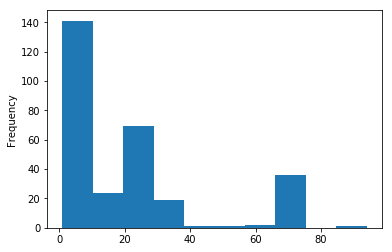

In [55]:
df['Province/State'].value_counts().plot.hist()

**Gráfico de barra**

Um gráfico com barras proporcionais aos valores que são representados em seus eixos. Aqui temos os 10 países/regiões mais frequentes.

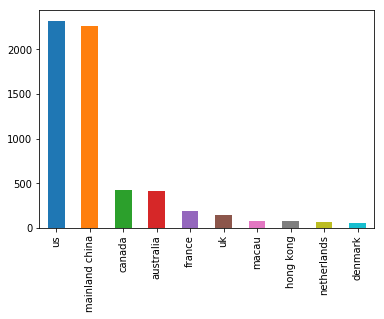

In [50]:
df['Country/Region'].value_counts()[:10].plot.bar()

**Gráfico de barra horizontal**

Mesma ideia do gráfico anterior, mas com as barras horizontais.

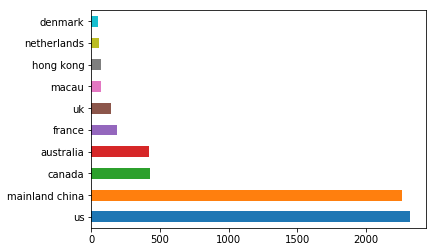

In [51]:
df['Country/Region'].value_counts()[:10].plot.barh()

**Scatter Plot**

Os gráficos de dispersão são utilizados para analisar a relação entre duas variáveis. Vemos, por exemplo, que conforme o número de casos confirmados cresce, o número de casos recuperados também o faz. 

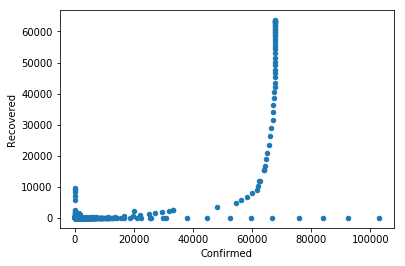

In [52]:
df.plot.scatter(x = 'Confirmed', y = 'Recovered')

**Pie Plot**

Gráficos de pizza são representações proporcionais de dados numéricos. Aqui vemos, dentre os 10 países/regiões mais frequentes, qual a proporção de cada um deles no total.

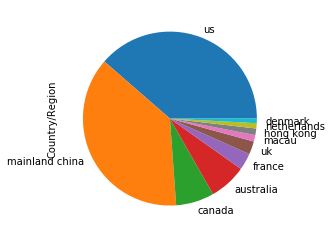

In [53]:
df['Country/Region'].value_counts()[:10].plot.pie()

### Exportação
Assim como lemos os dados de um arquivo, é possível salvar o dataframe criado/modificado num arquivo também. Algumas das possíveis funções são:

- [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html): exporta o arquivo no formato CSV.
- [to_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html): exporta o arquivo como uma planilha Excel.
- [to_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html): exporta o arquivo como o Json.
- [to_latex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html): exporta o arquivo para Latex.

In [54]:
df.to_csv('covid_after.csv', sep = ';')

## Exercícios

Os exercícios da aula podem ser encontrados [aqui](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula2/introducao_pandas.ipynb).

## Conclusão

Vimos na aula de hoje várias funcionalidades e sintaxes da biblioteca Pandas. Essa biblioteca é bem extensa e possui muuuuuitas funções legais. Recomendamos que façam os exercícios passados e que vejam a documentação das funções que acharem interessantes, pois cada uma delas tem suas próprias especificidades.  

Feedbacks e dúvidas são super bem vindos! Espero que tenham aprendido com essa aula, e sintam-se a vontade para conversar conosco sobre quaisquer dúvidas e curiosidades. o/

## Referências

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Uma introdução simples ao Pandas](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)
- [Documentação Pandas](https://pandas.pydata.org/docs/)
- [Dataset Original - Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## Dúvidas?

Caso algo não tenha ficado, sintam-se à vontade para entrar em contato conosco por meio do canal do Slack ou pelo telegram! 